# Análise de Drug Discovery

Dados fornecidos pela alura, baseados nas bases da seguinte competição do Kaggle: kaggle.com/c/lish-moa/overview

Temos duas bases de dados,:

- Com as *features* dos tratamentos, como variáveis dos tratamentos (dose, tempo de exposição, composto utilizado) e consequências a nível de expressão gênica (colunas 'g-') e de viabilidade celular (colunas 'c-')
- Com os resultados em mecanismos de ação (MoA, na sigla em inglês)
- mskdlmasd

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# importando bases

exp = pd.read_csv('https://github.com/SrBisco/imersao-dados-desafio-final/blob/dev/Dados/dados_experimentos.zip?raw=true', compression='zip')
res = pd.read_csv('https://github.com/SrBisco/imersao-dados-desafio-final/blob/dev/Dados/dados_resultados.csv?raw=true')

In [4]:
exp.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [5]:
exp.shape

(23814, 877)

In [6]:
res.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
res.shape

(23814, 207)

In [8]:
# balanceamento por tratamento

exp['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [9]:
# balanceamento por droga

qtde_droga = exp['droga'].value_counts(normalize=True)
qtde_droga

cacb2b860    0.078357
87d714366    0.030150
9f80f3f77    0.010330
8b87a7a83    0.008524
5628cb3ee    0.008482
               ...   
f2cc15da6    0.000042
263b9a195    0.000042
a8ec8311e    0.000042
eff33f208    0.000042
cf21e6ee0    0.000042
Name: droga, Length: 3289, dtype: float64

In [10]:
exp['droga'].value_counts(normalize=True).describe()

count    3289.000000
mean        0.000304
std         0.001508
min         0.000042
25%         0.000252
50%         0.000252
75%         0.000252
max         0.078357
Name: droga, dtype: float64

In [11]:
qtde_droga[qtde_droga>=exp['droga'].value_counts(normalize=True).describe()['50%']].count()/qtde_droga.count()

0.9382791121921557

In [12]:
exp2 = exp.copy()

In [13]:
exp = exp2.query('tratamento == "com_droga"')

In [14]:
cor = exp.loc[:,'g-0':'c-99'].corr()
cor

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
g-0,1.000000,0.071546,0.176710,0.023815,0.410954,-0.170003,0.257568,-0.406262,-0.614090,-0.437885,-0.566067,0.221179,-0.209361,0.488840,-0.358997,-0.200232,-0.523170,-0.443493,-0.000410,-0.085089,-0.472862,0.038699,0.016291,-0.088633,-0.353608,-0.238430,-0.428393,0.151791,-0.484860,-0.308278,-0.540069,0.575238,-0.151090,-0.148153,-0.128371,0.336791,-0.153650,-0.598671,0.616227,0.461049,...,-0.669439,-0.645758,-0.675921,-0.612417,-0.628438,-0.653684,-0.637200,-0.634872,-0.650280,-0.631503,-0.662863,-0.645369,-0.677368,-0.672942,-0.554296,-0.669203,-0.551471,-0.656870,-0.677823,-0.600846,-0.650631,-0.586055,-0.627885,-0.681931,-0.596081,-0.668216,-0.632346,-0.634789,-0.635479,-0.692232,-0.655268,-0.635507,-0.641811,-0.676145,-0.662953,-0.609125,-0.654989,-0.632158,-0.647554,-0.616603
g-1,0.071546,1.000000,-0.050010,-0.011016,0.164478,-0.144854,-0.115735,0.128779,-0.002324,-0.041429,-0.001983,0.161415,0.044962,-0.006111,0.009942,-0.072744,-0.059215,0.006892,-0.023821,-0.037649,-0.107562,0.178893,-0.073339,0.088869,-0.016528,-0.018288,-0.003705,0.010195,-0.090239,-0.087303,-0.045608,-0.045241,0.179629,-0.085679,0.047933,0.026557,-0.073354,0.009270,-0.046251,0.034999,...,-0.031689,-0.017823,-0.010455,0.002721,0.014912,0.010237,0.014301,-0.018796,-0.003811,-0.006694,-0.028381,0.013574,-0.029956,-0.007246,0.008511,-0.010878,0.030209,0.005259,-0.035454,0.017643,0.004236,-0.003217,0.014039,-0.015870,-0.008381,-0.010902,-0.005587,0.018570,-0.030446,-0.001649,-0.024877,0.009268,-0.017003,-0.024353,-0.031781,-0.001937,-0.013985,0.000235,0.009191,0.012057
g-2,0.176710,-0.050010,1.000000,0.040901,0.025538,0.014120,0.020787,-0.153612,-0.130559,-0.085536,-0.114650,0.011606,-0.063864,0.087185,-0.089409,-0.060799,-0.139968,-0.088768,0.046446,0.030037,-0.068204,-0.130767,-0.013376,-0.036385,-0.133718,-0.070799,-0.126588,0.032480,-0.134140,-0.025407,-0.159548,0.172952,-0.099526,-0.027519,-0.021312,0.008755,-0.027444,-0.159744,0.172619,0.144790,...,-0.182971,-0.186833,-0.190144,-0.178831,-0.167443,-0.176655,-0.190091,-0.170146,-0.185734,-0.172046,-0.185013,-0.182021,-0.178693,-0.184900,-0.155916,-0.186617,-0.185229,-0.164230,-0.183925,-0.165961,-0.187113,-0.174191,-0.189798,-0.181925,-0.169260,-0.192178,-0.160297,-0.177109,-0.168519,-0.179711,-0.187572,-0.190953,-0.170886,-0.194391,-0.181857,-0.161504,-0.186094,-0.182027,-0.172717,-0.175548
g-3,0.023815,-0.011016,0.040901,1.000000,-0.018447,0.045729,-0.033596,-0.172864,-0.091251,-0.021091,-0.089094,0.191058,0.025939,0.200727,0.124575,-0.060579,0.030569,-0.076094,0.237965,0.121072,0.018768,-0.155799,0.204079,-0.040606,-0.111889,0.176060,0.102015,-0.005121,-0.031577,-0.138747,-0.054637,0.098129,-0.086426,-0.096574,0.185830,-0.060562,-0.335630,-0.238887,0.084089,0.061662,...,-0.122706,-0.042549,-0.080743,-0.064276,-0.029805,-0.104808,-0.029917,-0.064957,-0.039084,-0.049931,-0.148207,-0.029194,-0.081807,-0.061058,-0.038173,-0.084237,-0.052381,-0.075904,-0.084176,-0.050403,-0.037534,-0.068030,-0.047670,-0.088029,-0.030454,-0.068747,-0.044220,0.009337,-0.051269,-0.071462,-0.099150,-0.049049,-0.095534,-0.095748,-0.086466,-0.019341,-0.088820,-0.053611,-0.084758,-0.042601
g-4,0.410954,0.164478,0.025538,-0.018447,1.000000,-0.061317,0.217751,-0.078081,-0.483885,-0.277567,-0.461466,0.114970,-0.205246,0.230727,-0.313437,0.015216,-0.294585,-0.429069,-0.010755,-0.105519,-0.306332,0.256019,-0.057792,-0.128306,-0.149150,-0.233332,-0.338317,0.082062,-0.360675,-0.236218,-0.409160,0.349982,0.064737,-0.039841,-0.074381,0.202561,-0.114055,-0.282911,0.306875,0.308945,...,-0.410711,-0.416856,-0.377931,-0.345305,-0.403895,-0.374608,-0

60

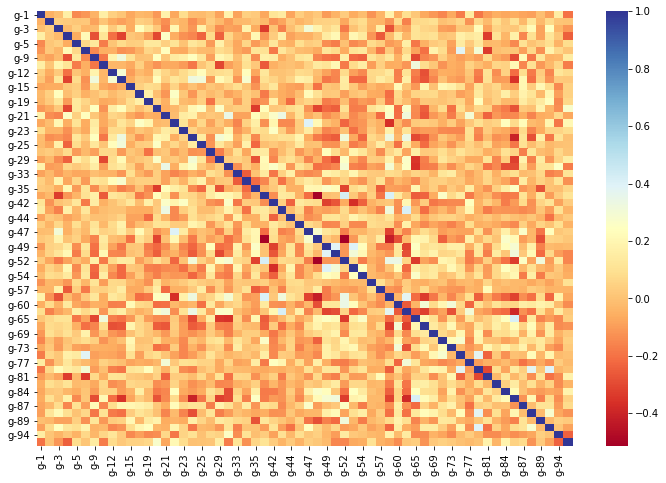

In [28]:
# diminuição de dimensionalidade mantendo a interpretabilidade
plt.figure(figsize=(12,8))

cor_g = cor.loc['g-0':'g-99','g-0':'g-99']
g = cor_g[abs(cor_g)<=0.4].dropna(thresh=80).index
sns.heatmap(cor_g.loc[g,g], cmap='RdYlBu')
len(g)

0.6190023798882294

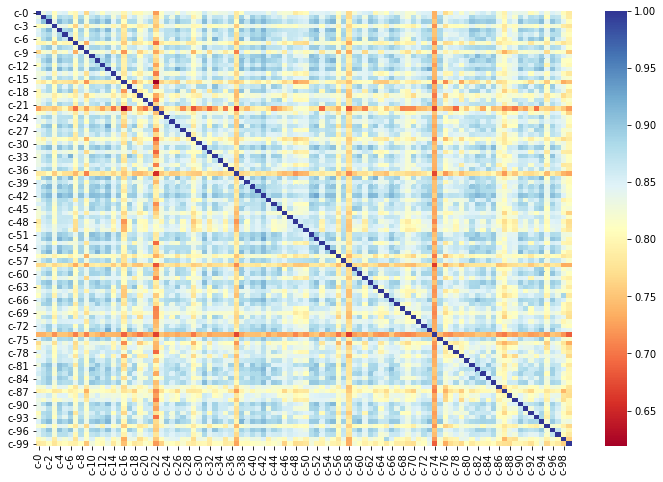

In [23]:
# diminuição de dimensionalidade mantendo a interpretabilidade
plt.figure(figsize=(12,8))

cor_c = cor.loc['c-0':'c-99','c-0':'c-99']
c = cor_c[abs(cor_c)<=1].dropna(thresh=0).index
sns.heatmap(cor_c.loc[c,c], cmap='RdYlBu')
len(c)

cor_c.min().min()

0.5281961370020212

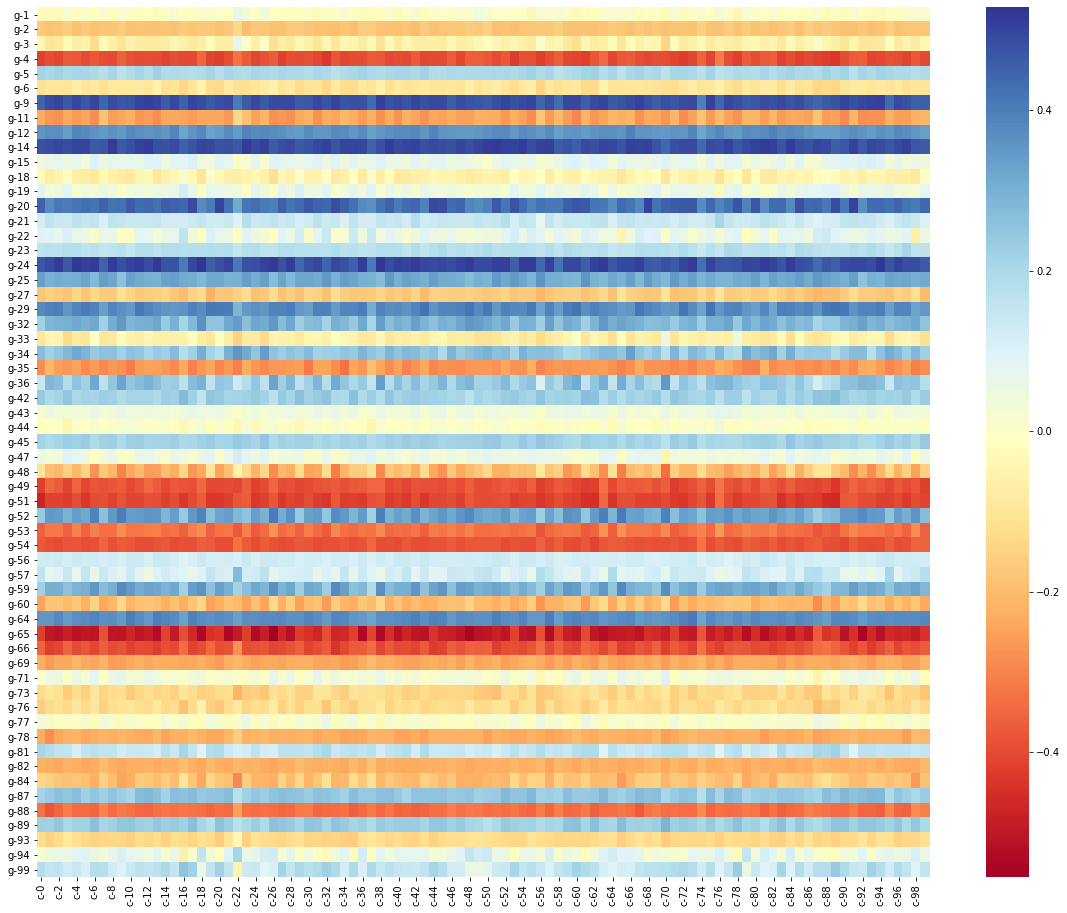

In [25]:
plt.figure(figsize=(20,16))
sns.heatmap(cor.loc[g,'c-0':'c-99'], cmap='RdYlBu')

cor.loc[g,'c-0':'c-99'].max().max()

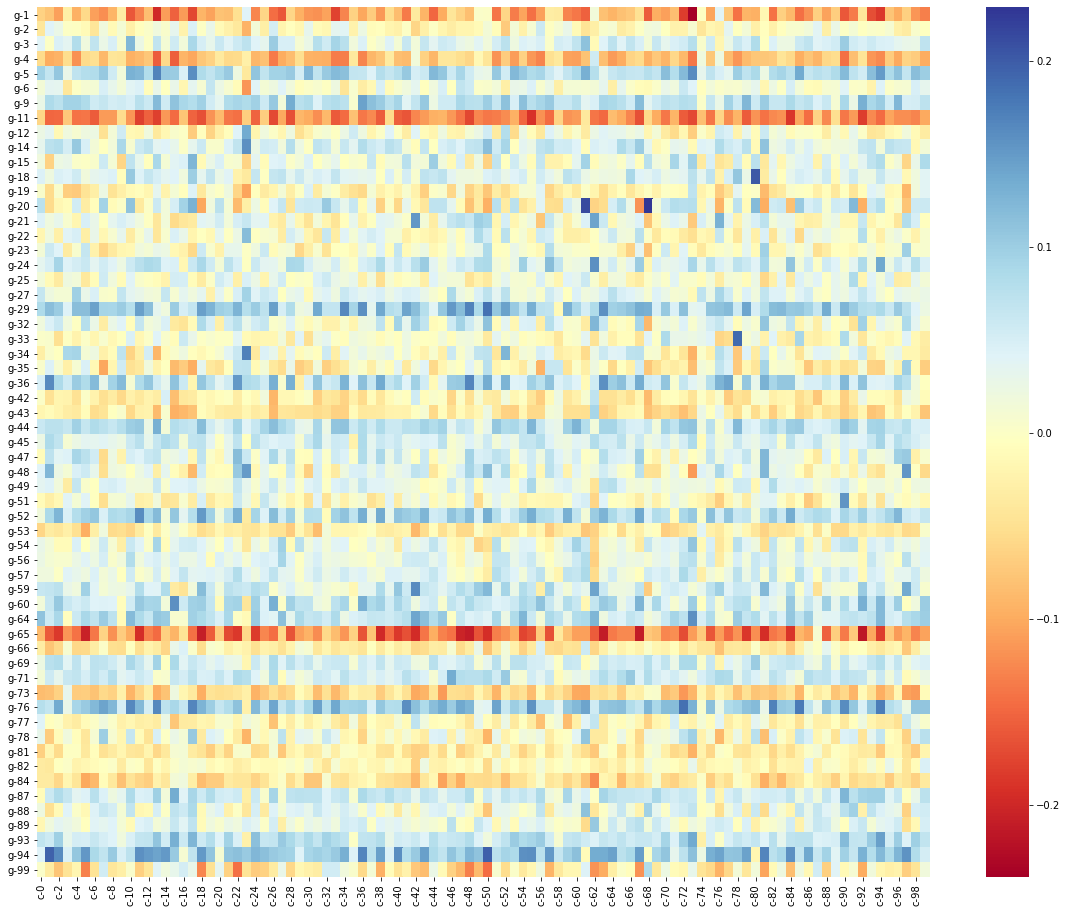

In [18]:
plt.figure(figsize=(20,16))
sns.heatmap(exp2.query("tratamento == 'com_controle'").corr().loc[g,'c-0':'c-99'], cmap='RdYlBu')

In [19]:
tbl = exp2.drop('tempo', axis=1).groupby('tratamento').agg(['mean', 'std']).reset_index().melt(id_vars='tratamento', var_name=['grupo', 'agg'])
tbl

,tratamento,grupo,agg,value
0,com_controle,g-0,mean,-0.096364
1,com_droga,g-0,mean,0.277675
2,com_controle,g-0,std,0.833248
3,com_droga,g-0,std,1.427121
4,com_controle,g-1,mean,-0.281979
...,...,...,...,...
3483,com_droga,c-98,std,1.888704
3484,com_controle,c-99,mean,0.263716
3485,com_droga,c-99,mean,-0.349560
3486,com_controle,c-99,std,0.698150


In [20]:
pivot = tbl.pivot_table(values='value', index='grupo', columns=['tratamento', 'agg'])
pivot

tratamento com_controle           com_droga          
agg                mean       std      mean       std
grupo                                                
c-0            0.127822  0.674085 -0.396219  1.809005
c-1            0.194264  0.797739 -0.510589  2.066069
c-10           0.241917  0.687044 -0.547917  2.131990
c-11           0.246343  0.805428 -0.534603  2.120370
c-12           0.089988  0.760583 -0.558939  2.210668
...                 ...       ...       ...       ...
g-95          -0.235452  0.834245  0.227241  1.344087
g-96          -0.038555  0.927339 -0.451876  1.660433
g-97           0.372568  0.762342  0.206575  1.284759
g-98           0.174032  0.742450 -0.296023  1.531671
g-99           0.037182  0.829670 -0.032029  0.926236

[872 rows x 4 columns]

In [21]:
dados_test = exp2.drop(['id'], axis=1).melt(id_vars=['tratamento', 'droga', 'dose', 'tempo'], var_name='grupo', )
dados_test

,tratamento,droga,dose,tempo,grupo,value
0,com_droga,b68db1d53,D1,24,g-0,1.0620
1,com_droga,df89a8e5a,D1,72,g-0,0.0743
2,com_droga,18bb41b2c,D1,48,g-0,0.6280
3,com_droga,8c7f86626,D1,48,g-0,-0.5138
4,com_droga,7cbed3131,D2,72,g-0,-0.3254
...,...,...,...,...,...,...
20765803,com_droga,df1d0a5a1,D2,24,c-99,0.4680
20765804,com_droga,ecf3b6b74,D2,24,c-99,0.3689
20765805,com_controle,cacb2b860,D2,48,c-99,0.3808
20765806,com_droga,8b87a7a83,D1,24,c-99,0.0740


In [24]:
from scipy.stats import ttest_ind


significante = dados_test.query('tratamento == "com_droga"').drop(['tratamento', 'value'], axis=1)




In [ ]:
from scipy.stats import ttest_ind, anderson_ksamp

for linha in significante.iterrows():
  
  dg = linha[1].droga
  ds = linha[1].dose
  tp = linha[1].tempo

  ctrl = dados_test.query('tratamento == "com_controle" & dose == @ds & tempo == @tp').value
  tst = dados_test.query('droga == @dg & dose == @ds & tempo == @tp').value

  

  st, cv, cp = anderson_ksamp([np.array(ctrl), np.array(tst)])

  significante.query('droga == @dg & dose == @ds & tempo == @tp')['valor_p'] = cp
  
  print(cp)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: p-value floored: true value smaller than 0.001
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


0.001
0.001
0.001
0.001
0.10375788310956684
0.001
0.001
0.001
0.002394731103366036
0.001
0.001
0.001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: p-value capped: true value larger than 0.25
  


A saída de streaming foi truncada nas últimas 5000 linhas.
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.0031566766435892463
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.004235456750143603
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.0035132867118546672
0.001
0.001
0.010719413246159312
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.2223094973319139
0.001
0.001
0.01860941892016051
0.001
0.001
0.001
0.25
0.001
0.001
0.026036859862011652
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.005050214594978339
0.001
0.006162704343589391
0.001
0.001
0.001
0.001
0.001
0.001
0.0015600976097629705
0.001
0.001
0.001
0.001
0.001
0.001
0.007678777130760732
0.001
0.001
0.008936083887270931
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001483853622603002
0.001
0.001
0.001
0.001
0.001
0.001
0.25
0.001
0.001
0.001
0.001
0.00178130681352997
0.0016118011580290822
0.001
0.001
0.001
0.001
0.06467362812163908
0.001
0.001
0.001
0.001
0.001
0.009547818122340365
0.001

In [ ]:
'jklas_mkasd_mk'.split(sep='_')[-1]

In [29]:
res2 = res.copy()
res2.columns = [col.split(sep='_')[-1] for col in res2.columns]

In [35]:
pd.Series([col.split(sep='_')[-1] for col in res2.columns]).value_counts()

inhibitor            112
antagonist            32
agonist               28
activator              5
agent                  3
blocker                2
b                      1
antioxidant            1
id                     1
antiarrhythmic         1
steroid                1
scavenger              1
antibiotic             1
anti-inflammatory      1
medium                 1
local                  1
secretagogue           1
anticonvulsant         1
laxative               1
antifolate             1
antihistamine          1
diuretic               1
analgesic              1
sensitizer             1
antifungal             1
antimalarial           1
antiviral              1
antiprotozoal          1
stimulant              1
immunosuppressant      1
donor                  1
dtype: int64

In [39]:
pd.Series([col for col in res.columns if col.split(sep='_')[-1]=='antagonist' ]).value_counts()

histamine_receptor_antagonist                      1
androgen_receptor_antagonist                       1
acetylcholine_receptor_antagonist                  1
gaba_receptor_antagonist                           1
ppar_receptor_antagonist                           1
estrogen_receptor_antagonist                       1
trpv_antagonist                                    1
cck_receptor_antagonist                            1
prostanoid_receptor_antagonist                     1
angiotensin_receptor_antagonist                    1
cannabinoid_receptor_antagonist                    1
leukotriene_receptor_antagonist                    1
transient_receptor_potential_channel_antagonist    1
retinoid_receptor_antagonist                       1
adrenergic_receptor_antagonist                     1
atp-sensitive_potassium_channel_antagonist         1
orexin_receptor_antagonist                         1
smoothened_receptor_antagonist                     1
opioid_receptor_antagonist                    

In [38]:
pivot = res2.melt(id_vars = 'id', var_name='ação').pivot_table(index='id', columns='ação', aggfunc='sum', margins=True)
pivot

value                ...                         
ação         activator agent agonist  ... steroid stimulant    All
id                                    ...                         
id_000644bb2         0     0       0  ...       0         0      1
id_000779bfc         0     0       0  ...       0         0      0
id_000a6266a         0     0       0  ...       0         0      3
id_0015fd391         0     0       0  ...       0         0      0
id_001626bd3         0     0       0  ...       0         0      1
...                ...   ...     ...  ...     ...       ...    ...
id_fffb70c0c         0     0       1  ...       0         0      1
id_fffc1c3f4         0     0       0  ...       0         0      0
id_fffcb9e7c         0     0       0  ...       0         0      1
id_ffffdd77b         0     0       0  ...       0         0      0
All                115   150    2330  ...       6        49  16844

[23815 rows x 31 columns]

In [32]:
pivot.iloc[:,-1].value_counts()

1        12532
0         9367
2         1538
3          303
4           55
5           13
7            6
16844        1
Name: (value, All), dtype: int64

In [50]:
filtro_col = [col for col in res.columns if col.split(sep='_')[-1]=='inhibitor' ]
filtro_col

res.loc[:,filtro_col].sum().sort_values()

erbb2_inhibitor                            1
atm_kinase_inhibitor                       6
elastase_inhibitor                         6
protein_phosphatase_inhibitor              6
ubiquitin_specific_protease_inhibitor      6
                                        ... 
cdk_inhibitor                            340
dna_inhibitor                            402
cyclooxygenase_inhibitor                 435
proteasome_inhibitor                     726
nfkb_inhibitor                           832
Length: 112, dtype: int64

In [47]:
exp2.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [51]:
(726)/(1866+726)

0.2800925925925926

# Cruzamento